**Всем нам нужен мир и счастье!**

Использовался вот этот датасет для выполнения ДЗ https://www.kaggle.com/datasets/konradb/global-peace-index

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_data = pd.read_csv('peace_index.csv', sep = ';')
df_data.replace(',','.', inplace=True)
df_data

,Country,iso3c,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,3.153,3.246,3.087,3.038,3.069,3.101,3.095,3.108,3.369,3.480,3.513,3.636,3.626,3.626,3.626,3.434
1,Angola,AGO,1.655,1.827,1.615,1.816,1.615,1.615,1.609,1.408,1.403,1.403,1.610,1.615,1.413,1.621,1.608,1.639
2,Albania,ALB,1.247,1.270,1.293,1.293,1.293,1.282,1.270,1.259,1.259,1.247,1.236,1.224,1.414,1.403,1.403,1.403
3,United Arab Emirates,ARE,1.000,1.000,1.000,1.213,1.238,1.241,1.253,1.264,1.477,1.517,1.563,1.598,1.833,1.701,1.689,1.678
4,Argentina,ARG,1.403,1.604,1.604,1.403,1.403,1.604,1.403,1.403,1.403,1.403,1.201,1.201,1.201,1.201,1.201,1.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Vietnam,VNM,1.302,1.302,1.302,1.302,1.302,1.403,1.403,1.403,1.403,1.421,1.421,1.421,1.421,1.421,1.403,1.403
159,Yemen,YEM,2.012,2.012,2.201,2.233,2.261,2.474,2.543,2.596,2.964,3.417,3.368,3.603,3.501,3.377,3.354,3.486
160,South Africa,ZAF,1.403,1.805,1.805,1.805,1.805,1.805,1.805,1.906,1.760,1.760,1.760,1.824,1.772,1.745,1.818,2.083
161,Zambia,ZMB,1.201,1.201,1.201,1.000,1.000,1.000,1.201,1.201,1.220,1.238,1.238,1.256,1.286,1.700,1.520,1.577


Сформулируем гипотезу:

H0: Мир стал менее миролюбив в 2021 году, в сравнении с 2018 годом

H1: Мир стал более миролюбив в 2021 году, в сравнении с 2018 годом

Найдем самую счастливую страну в 2021 году:

In [ ]:
def find_happiest(df: pd.DataFrame, year: str)-> str:
  return df[df[year] == df[year].min()]['Country'].values[0]
for y in [str(i) for i in range(2008, 2024, 1)]:
  happiest_country = find_happiest(df_data, y)
  print(f"Самая миролюбивая страна в {y} году это {happiest_country}")

Самая миролюбивая страна в 2008 году это United Arab Emirates
Самая миролюбивая страна в 2009 году это United Arab Emirates
Самая миролюбивая страна в 2010 году это United Arab Emirates
Самая миролюбивая страна в 2011 году это Botswana
Самая миролюбивая страна в 2012 году это Botswana
Самая миролюбивая страна в 2013 году это Botswana
Самая миролюбивая страна в 2014 году это Botswana
Самая миролюбивая страна в 2015 году это Botswana
Самая миролюбивая страна в 2016 году это Botswana
Самая миролюбивая страна в 2017 году это Botswana
Самая миролюбивая страна в 2018 году это Botswana
Самая миролюбивая страна в 2019 году это Botswana
Самая миролюбивая страна в 2020 году это Botswana
Самая миролюбивая страна в 2021 году это Bulgaria
Самая миролюбивая страна в 2022 году это Bulgaria
Самая миролюбивая страна в 2023 году это Iceland


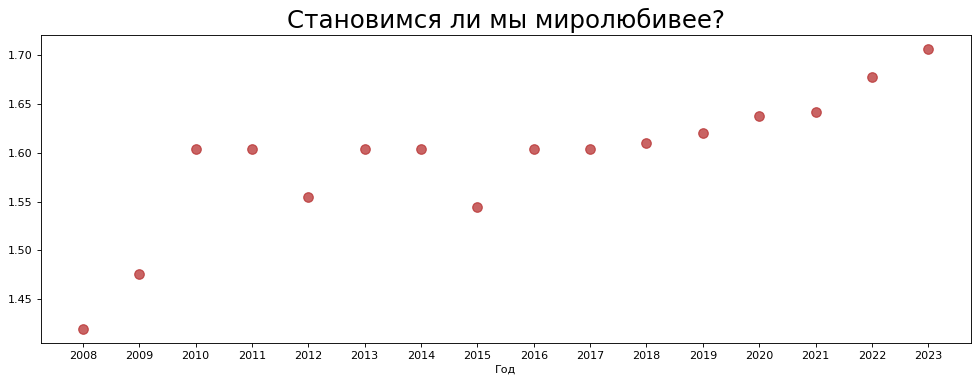

In [ ]:
med_happy_lvl = []
for y in [str(i) for i in range(2008, 2024, 1)]:
  med_happy_lvl.append(df_data[y].median())

fig, ax = plt.subplots(figsize=(15,5), dpi= 80)
ax.scatter(y= np.array(med_happy_lvl), x = np.array(df_data.columns[2:].values) , s=75, color='firebrick', alpha=0.7)

ax.set_title('Становимся ли мы миролюбивее?', fontdict={'size':22})
ax.set_xlabel('Год')
ax.set_xticks(df_data.columns[2:].values)
plt.show()

Очевидлно, что нет, мы только становимся более жестокими

Проверим насколько коррелирует уровень миролюбия в 2018 и 2021 годах

In [ ]:
r, _ = stats.pearsonr(df_data['2018'].values, df_data['2021'].values)
print(f"Коэффициент корреляции по Пирсону {np.round(r,2)}")

Коэффициент корреляции по Пирсону 0.96


Будем считать, что везде мир сходит с ума одинаково. Тут уже можно сделать выводы о том, что в 2018 была более мирная жизнь, но мы обратимся к статистике

Для применения t-test нужно выполнение двух условий:
- Нормальное распределение величины (проверим по притерию Шапиро)
-  σX ≈ σY


In [ ]:
def AB_test(dataA: np.ndarray, dataB: np.ndarray) -> float:
    shapiroA = stats.shapiro(dataA)[1]
    shapiroB = stats.shapiro(dataB)[1]

    if (shapiroA == False) & (shapiroB == False):
        p_val = stats.ttest_ind(dataA, dataB)[1]
    else:
        p_val = stats.mannwhitneyu(dataA, dataB)[1]

    sns.kdeplot(dataA, color="orange", label="dataA", alpha=.7)
    sns.kdeplot(dataB, color="blue", label="dataB", alpha=.7)
    plt.legend()
    plt.show()

    if p_val < 0.05:
      print(f"H0 не подтвердилась")
    else:
      print(f"H0 подтвердилась")

    return p_val

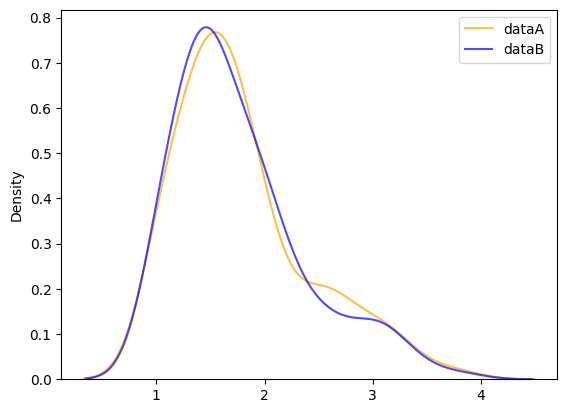

H0 подтвердилась
P-value : 0.7684


In [ ]:
a = df_data['2021'].values
b = df_data['2018'].values
print(f"P-value : {np.round(AB_test(a,b),4)}")

В 2021 году стало жить менее спокойно, чем в 2018

Проверим новую гипотезу:

H0: На руси жить хорошо (лучше , чем в Исландии)

H1: Это не так, в Исландии лучше


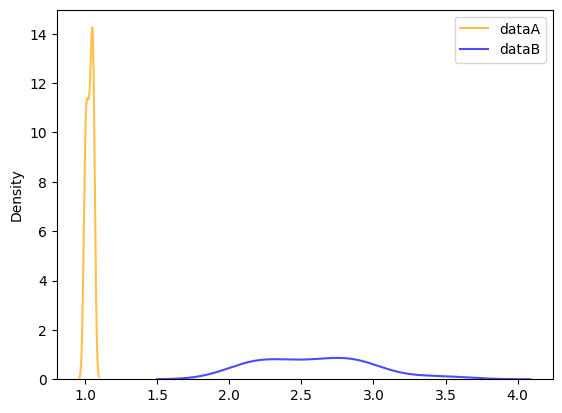

H0 не подтвердилась
P-value : 0.0


In [ ]:
a = list(df_data[df_data['Country'] == 'Iceland'].values[0][2:])
b = list(df_data[df_data['Country'] == 'Russia'].values[0][2:])
print(f"P-value : {np.round(AB_test(a,b),4)}")

Примечания: в ДЗ сравниваются страны по  "Global Peace Index", то есть проверяется сходимость двух выборок данных